In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\Zyad Zarin\src\Python\Programming-Performance-via-FLS\.venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


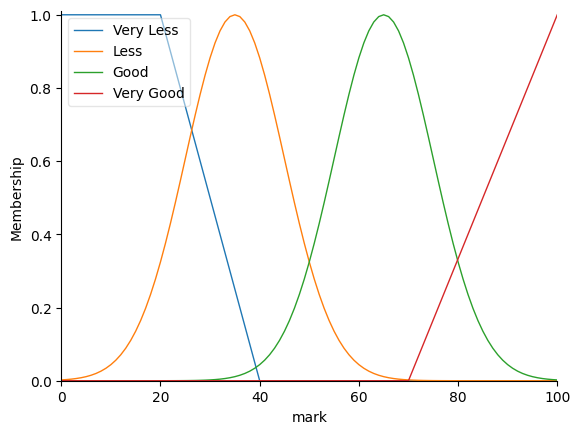

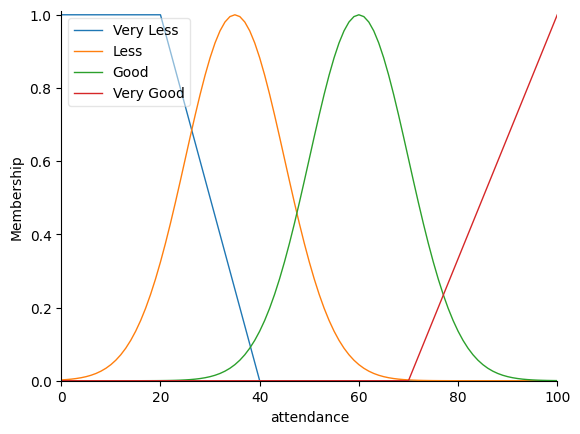

In [3]:
# Generate universe variables
mark = control.Antecedent(np.arange(0, 101, 1), 'mark') # 0-100
mark['Very Less'] = fuzz.trapmf(mark.universe, [0, 0, 20, 40])
mark['Less'] = fuzz.gaussmf(mark.universe, mean=35, sigma=10)
mark['Good'] = fuzz.gaussmf(mark.universe, mean=65, sigma=10)
mark['Very Good'] = fuzz.trapmf(mark.universe, [70, 100, 100, 100])

attendance = control.Antecedent(np.arange(0, 101, 1), 'attendance') # 0-100
attendance['Very Less'] = fuzz.trapmf(attendance.universe, [0, 0, 20, 40])
attendance['Less'] = fuzz.gaussmf(attendance.universe, mean=35, sigma=10)
attendance['Good'] = fuzz.gaussmf(attendance.universe, mean=60, sigma=10)
attendance['Very Good'] = fuzz.trapmf(attendance.universe, [70, 100, 100, 100])

mark.view()
attendance.view()

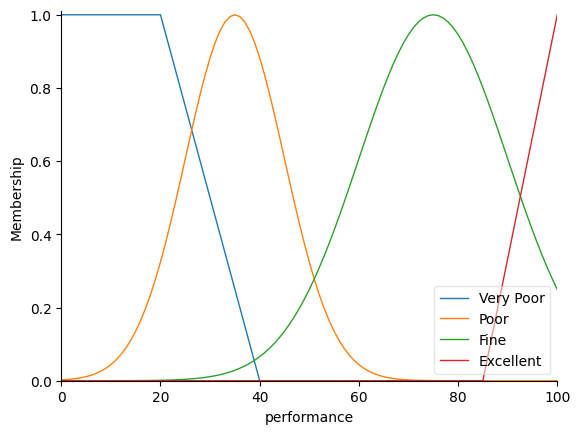

In [4]:
# Performance
performance = control.Consequent(np.arange(0, 101, 1), 'performance') # 0-100
performance['Very Poor'] = fuzz.trapmf(performance.universe, [0, 0, 20, 40])
performance['Poor'] = fuzz.gaussmf(performance.universe, mean=35, sigma=10)
performance['Fine'] = fuzz.gaussmf(performance.universe, mean=75, sigma=15)
performance['Excellent'] = fuzz.trapmf(performance.universe, [85, 100, 100, 100])

performance.view()

# Rules

In [5]:
rules = [
    control.Rule(mark['Very Less'] & attendance['Very Less'], performance['Very Poor']),
    control.Rule(mark['Less'] & attendance['Less'], performance['Poor']),
    control.Rule(mark['Good'] & attendance['Good'], performance['Fine']),
    control.Rule(mark['Very Good'] & attendance['Very Good'], performance['Excellent']),
    control.Rule(mark['Good'] & attendance['Very Less'], performance['Very Poor']),
    control.Rule(mark['Good'] & attendance['Less'], performance['Poor']),
    control.Rule(mark['Very Good'] & attendance['Less'], performance['Poor']),
    control.Rule(mark['Very Less'] & attendance['Good'], performance['Very Poor']),
    control.Rule(mark['Less'] & attendance['Good'], performance['Poor']),
    control.Rule(mark['Very Less'] & attendance['Very Good'], performance['Very Poor']),
    control.Rule(mark['Less'] & attendance['Very Good'], performance['Poor']),
    control.Rule(mark['Very Good'] & attendance['Very Less'], performance['Very Poor']),
]
# rule1 = control.Rule(mark['Very Less'] & attendance['Very Less'], performance['Very Poor'])
# rule2 = control.Rule(mark['Less'] & attendance['Less'], performance['Poor'])
# rule3 = control.Rule(mark['Good'] & attendance['Good'], performance['Fine'])
# rule4 = control.Rule(mark['Very Good'] & attendance['Very Good'], performance['Excellent'])
# rule5 = control.Rule(mark['Good'] & attendance['Very Less'], performance['Very Poor'])
# rule6 = control.Rule(mark['Good'] & attendance['Less'], performance['Poor'])
# rule7 = control.Rule(mark['Very Good'] & attendance['Less'], performance['Poor'])
# rule8 = control.Rule(mark['Very Less'] & attendance['Good'], performance['Very Poor'])
# rule9 = control.Rule(mark['Less'] & attendance['Good'], performance['Poor'])
# rule10 = control.Rule(mark['Very Less'] & attendance['Very Good'], performance['Very Poor'])
# rule11 = control.Rule(mark['Less'] & attendance['Very Good'], performance['Poor'])
# rule12 = control.Rule(mark['Very Good'] & attendance['Very Less'], performance['Very Poor'])

for rule in rules:
    print(40*'-')
    print(rule)

----------------------------------------
IF mark[Very Less] AND attendance[Very Less] THEN performance[Very Poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
IF mark[Less] AND attendance[Less] THEN performance[Poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
IF mark[Good] AND attendance[Good] THEN performance[Fine]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
IF mark[Very Good] AND attendance[Very Good] THEN performance[Excellent]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
IF mark[Good] AND attendance[Very Less] THEN performance[Very Poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
IF mark[Good] AND attendance[Less] THEN performance[Poor]
	AND aggregation function : fmin
	OR

# Defuzzification

Student's Programming Performance: 74.49%


c:\Users\Zyad Zarin\src\Python\Programming-Performance-via-FLS\.venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


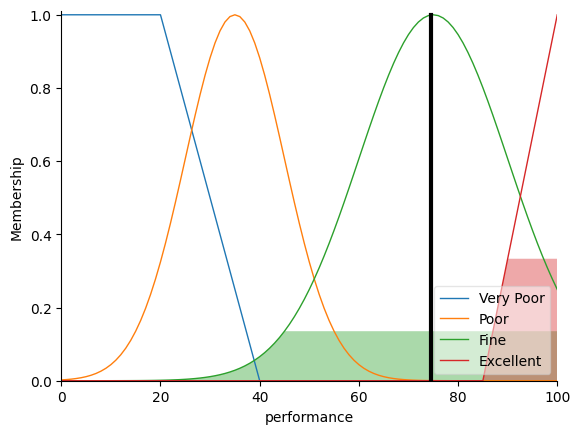

In [7]:
performance_ctrl = control.ControlSystem(rules)

performance_sim = control.ControlSystemSimulation(performance_ctrl)

performance_sim.input['mark'] = 80
performance_sim.input['attendance'] = 80

performance_sim.compute()

print(f"Student's Programming Performance: {performance_sim.output['performance']:.2f}%")
performance.view(sim=performance_sim)
plt.show()